 #  Loan Approval Prediction

--------------------------------------------------------------------------------------------------------------------------------------------------------------------



## Context

Loan approval prediction refers to the use of machine learning techniques to predict the likelihood of a loan application being approved or denied by banks and financial institutions. By using advanced algorithms and predictive models, banks can streamline their loan approval processes and make informed decisions for the benefit of both lenders and borrowers.

The dataset includes various details about loan seekers including their personal and financial information, such as gender, marital status, education level, income, loan amount, loan term, credit history, property size and loan approval status.

## Load the Dataset 

Kaggle Source - https://www.kaggle.com/datasets/ninzaami/loan-predication

In [1]:
# Importation of libraries 

# Basic Tools
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy

# ML Tools
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load the dataset 

df = pd.read_csv("loan_prediction.csv")

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Overview

In [3]:
# Shape

df.shape

(614, 13)

In [4]:
# Info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


We have 13 columns and 614 rows (individuals)

In [5]:
# Statistical overview concerning numerical value 

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


We can observe existence of missings (Loan Amont) values in the "Count" Column. Let's check that

In [6]:
# Missins Values 

df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

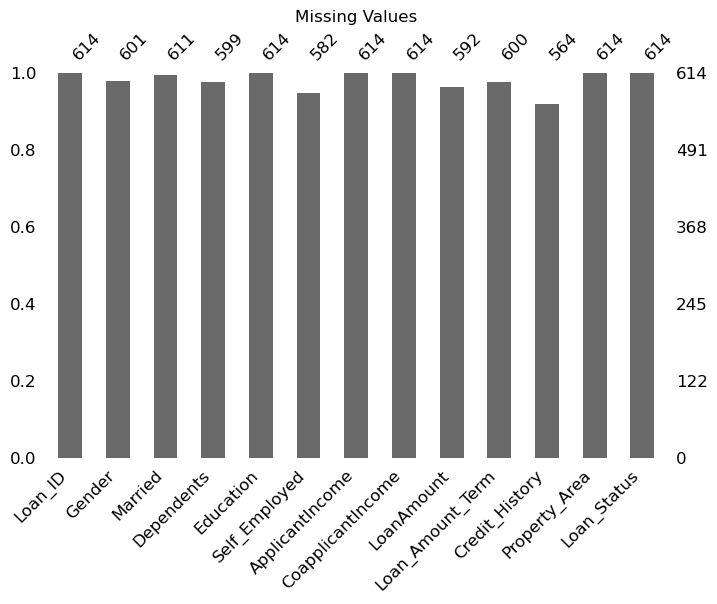

In [7]:
# Visualisation of missings values 

msno.bar(df,figsize=(8,5),
    fontsize=12,
    labels="Missing_Fields",
    label_rotation=45)
plt.title("Missing Values")
plt.show()

## EDA 

### Data Visualisation of parameters 

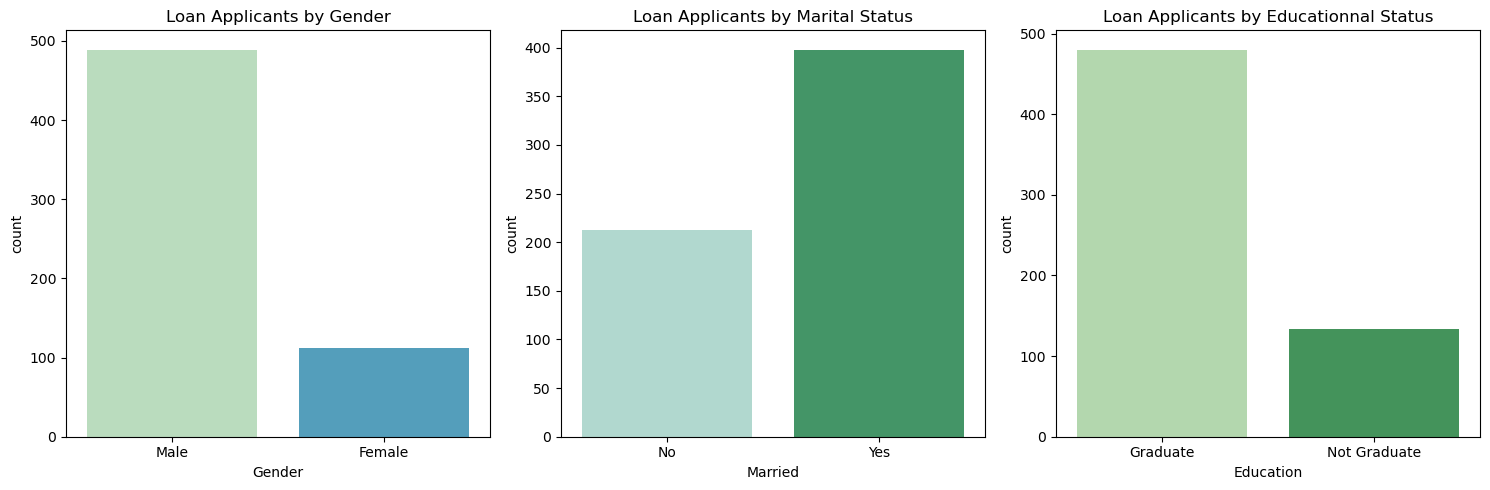

In [8]:
# Count plots of categorical data 

# Creation of 3 sub graph
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 lign and 3 columns

# Gender 
sns.countplot(data = df, x = 'Gender', palette='GnBu',ax=axes[0])
axes[0].set_title("Loan Applicants by Gender")

# Marital Status
sns.countplot(data = df, x = 'Married', palette='BuGn',ax=axes[1])
axes[1].set_title("Loan Applicants by Marital Status")

# Education 
sns.countplot(data=df, x='Education', palette="Greens", ax=axes[2])
axes[2].set_title("Loan Applicants by Educationnal Status")

plt.tight_layout() 
plt.show()


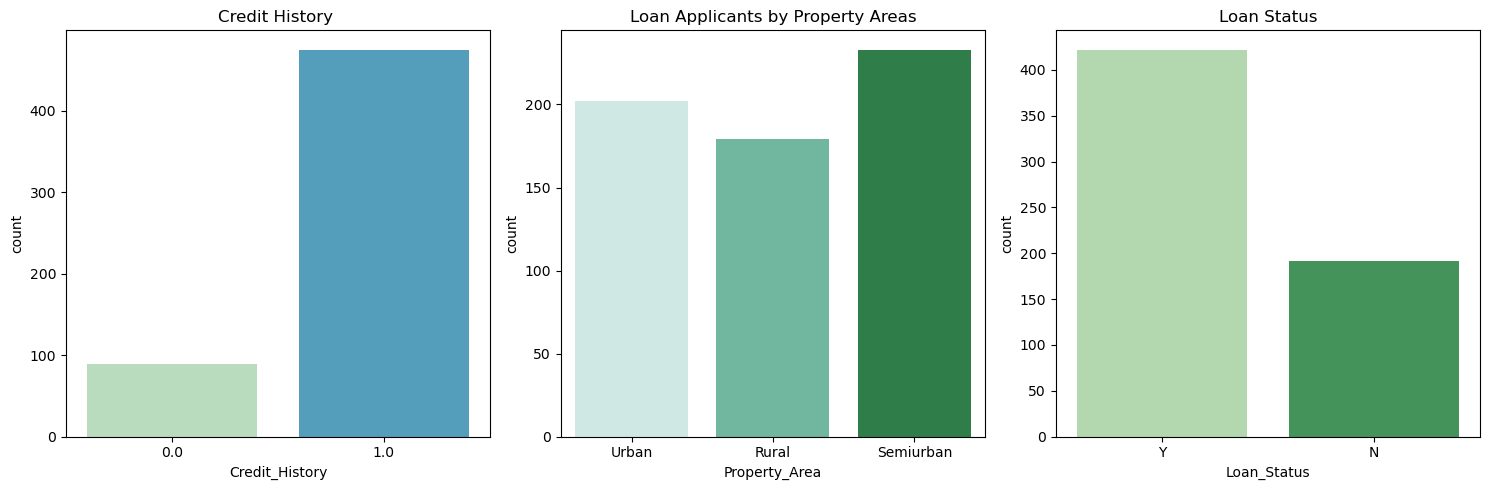

In [9]:
# Count plots of categorical data 

# Creation of 3 sub graph
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 lign and 3 columns

# Credit History
sns.countplot(data = df, x = 'Credit_History', palette='GnBu',ax=axes[0])
axes[0].set_title("Credit History ")

# Property Area
sns.countplot(data = df, x = 'Property_Area', palette='BuGn',ax=axes[1])
axes[1].set_title("Loan Applicants by Property Areas")

# Loan Status 
sns.countplot(data=df, x='Loan_Status', palette="Greens", ax=axes[2])
axes[2].set_title("Loan Status")

plt.tight_layout() 
plt.show()

We observe in the dataset that the number of approved loans is significantly higher than the number of rejected ones. To develop an effective prediction model, we need a balanced dataset to prevent overfitting and ensure that the model learns from a diverse set of training samples.

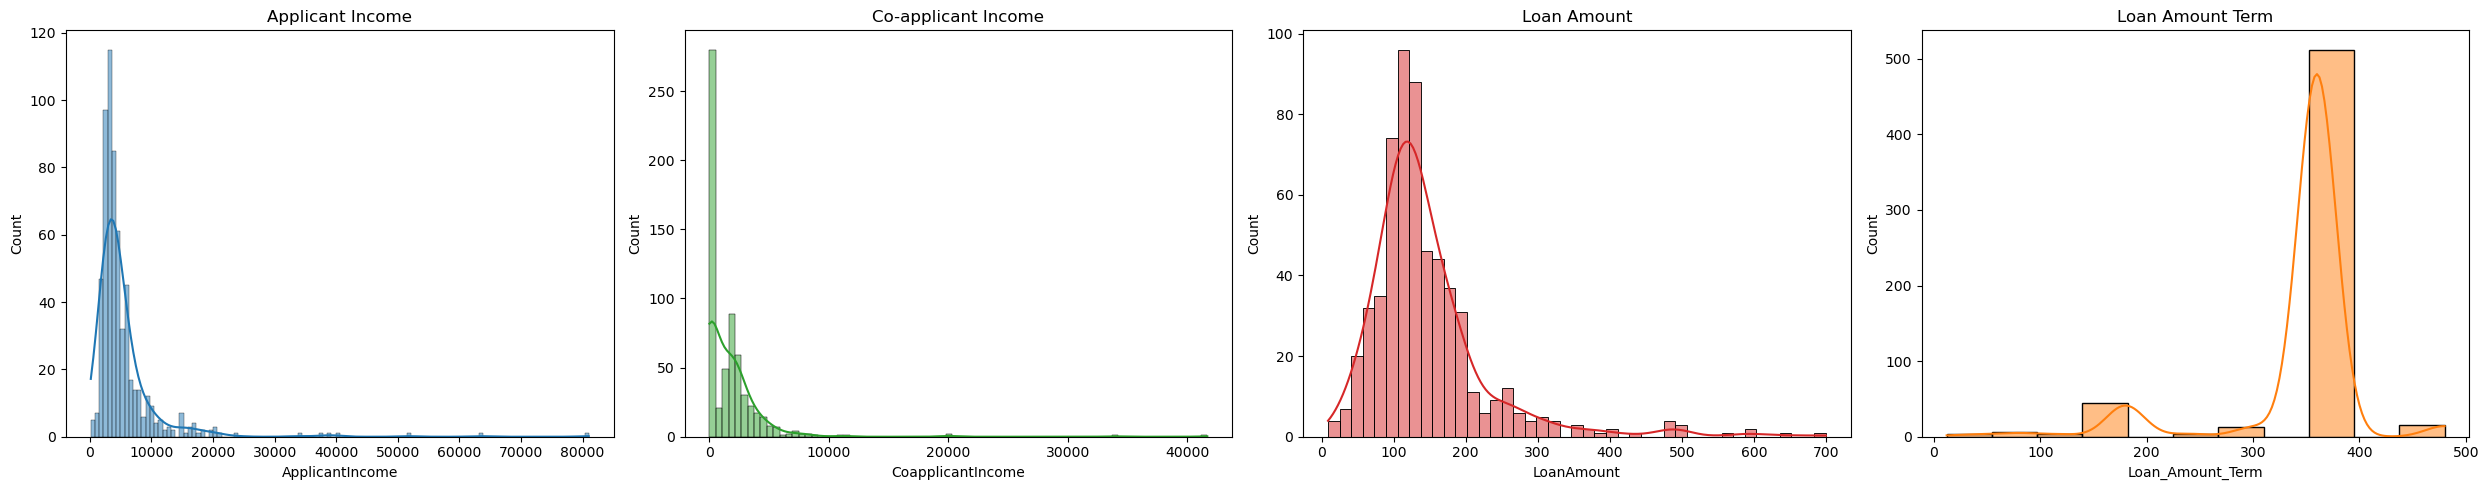

In [10]:
# Histogram and distribution plot of numerical data

# Creation of 4 sub graph
fig, axes = plt.subplots(1, 4, figsize=(25, 5))  # 1 lign and 4 columns

# Applicant Income
sns.histplot(data=df, x='ApplicantIncome', kde=True, color="#1f77b4", ax=axes[0])  
axes[0].set_title("Applicant Income")

# Co-applicant Income
sns.histplot(data=df, x='CoapplicantIncome', kde=True, color="#2ca02c", ax=axes[1])  
axes[1].set_title("Co-applicant Income")

# Loan Amount 
sns.histplot(data=df, x='LoanAmount', kde=True, color="#d62728", ax=axes[2])  
axes[2].set_title("Loan Amount")

# Loan Amount Term 
sns.histplot(data=df, x='Loan_Amount_Term', kde=True, color="#ff7f0e", ax=axes[3]) 
axes[3].set_title("Loan Amount Term")

plt.tight_layout()
plt.show()


With these graphics, we can underline that the majority of loan applicants have an annual income of less than 10,000. We can also observe that the preferred loan amount is between 100 and 200. Additionally, the preferred loan amount term is around 360 days.

> Furthermore, we can also observe that the first three graphs have a long tail on the right, which characterizes a positively skewed distribution. 

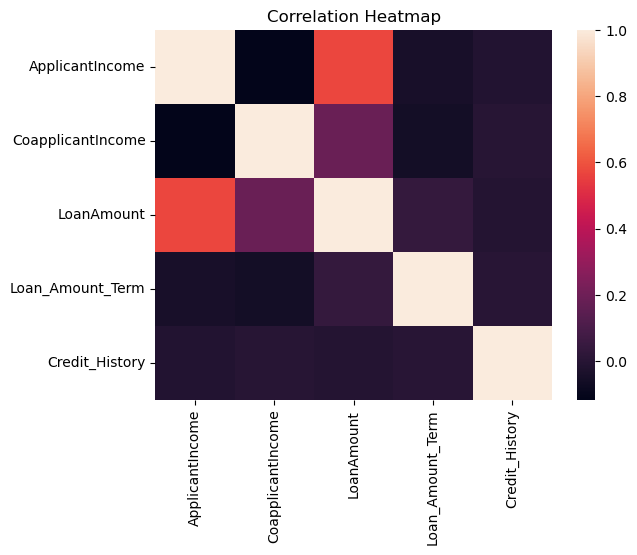

In [11]:
# HeatMap 

df_num = df.select_dtypes('number')
df_num = pd.DataFrame(df_num)

correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix)
plt.title("Correlation Heatmap")
plt.show()

## Data Preprocessing 

Goal : Deal with the NaN, missings values

In [12]:
# Imputatiion method to deal with these values with the most frequent value using mode() method or median() for LoanAmount

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
# Drop Loan ID column

df.drop(columns=["Loan_ID"], axis = 1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
# Preparation of the Dataframe for the Machine learning process

# Convert the categorical variables into numerical (Use of Get-Dummies)

df_ML = pd.get_dummies(df)

df_ML

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,True
1,4583,1508.0,128.0,360.0,1.0,False,True,False,False,False,...,False,True,False,True,False,True,False,False,True,False
2,3000,0.0,66.0,360.0,1.0,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,True
3,2583,2358.0,120.0,360.0,1.0,False,False,False,True,False,...,False,False,True,True,False,False,False,True,False,True
4,6000,0.0,141.0,360.0,1.0,False,False,False,False,True,...,False,True,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,False,False,False,False,False,...,False,True,False,True,False,True,False,False,False,True
610,4106,0.0,40.0,180.0,1.0,False,False,False,False,False,...,True,True,False,True,False,True,False,False,False,True
611,8072,240.0,253.0,360.0,1.0,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,True
612,7583,0.0,187.0,360.0,1.0,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,True


In [15]:
# Name of columns 

df_ML.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_ID_LP001002',
       'Loan_ID_LP001003', 'Loan_ID_LP001005', 'Loan_ID_LP001006',
       'Loan_ID_LP001008',
       ...
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_N',
       'Loan_Status_Y'],
      dtype='object', length=636)

In [16]:
# Drop and rename columns 

df_ML.drop(columns=["Gender_Female","Married_No",'Education_Not Graduate','Self_Employed_No','Loan_Status_N'], axis = 1, inplace= True)



In [17]:
df_ML.rename(columns={'Gender_Male' : 'Gender', 
                      'Married_Yes':'Married',
                      'Education_Graduate': 'Education',
                      'Self_Employed_Yes': 'Self_Employed',
                      'Loan_Status_Y':'Loan_Status'}, inplace = True)

df_ML

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,128.0,360.0,1.0,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,False,True,False,False,False,...,False,True,False,False,True,False,True,False,False,False
2,3000,0.0,66.0,360.0,1.0,False,False,True,False,False,...,True,False,False,False,True,True,False,False,True,True
3,2583,2358.0,120.0,360.0,1.0,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,False,False,False,False,True,...,True,False,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,False,False,False,False,False,...,True,False,False,False,True,False,True,False,False,True
610,4106,0.0,40.0,180.0,1.0,False,False,False,False,False,...,False,False,False,True,True,False,True,False,False,True
611,8072,240.0,253.0,360.0,1.0,False,False,False,False,False,...,False,True,False,False,True,False,False,False,True,True
612,7583,0.0,187.0,360.0,1.0,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,True


In [18]:
# Remove the outliers

df_numeric = df_ML.select_dtypes(include=['number'])

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df_numeric[~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)]

# Update 
df_ML = df_ML.loc[df_filtered.index]

df_ML

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,128.0,360.0,1.0,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,False,True,False,False,False,...,False,True,False,False,True,False,True,False,False,False
2,3000,0.0,66.0,360.0,1.0,False,False,True,False,False,...,True,False,False,False,True,True,False,False,True,True
3,2583,2358.0,120.0,360.0,1.0,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,False,False,False,False,True,...,True,False,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,3987,1411.0,157.0,360.0,1.0,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
608,3232,1950.0,108.0,360.0,1.0,False,False,False,False,False,...,True,False,False,False,True,False,True,False,False,True
609,2900,0.0,71.0,360.0,1.0,False,False,False,False,False,...,True,False,False,False,True,False,True,False,False,True
611,8072,240.0,253.0,360.0,1.0,False,False,False,False,False,...,False,True,False,False,True,False,False,False,True,True


In [19]:
# Due to the positive skewed distribution, I will use the sqrt methode to reduce asymetric values 

df_ML['ApplicantIncome'] = np.sqrt(df_ML['ApplicantIncome'])
df_ML['CoapplicantIncome'] = np.sqrt(df_ML['CoapplicantIncome'])
df_ML['LoanAmount'] = np.sqrt(df_ML['LoanAmount'])

df_ML

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,76.478755,0.000000,11.313708,360.0,1.0,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,True
1,67.697858,38.832976,11.313708,360.0,1.0,False,True,False,False,False,...,False,True,False,False,True,False,True,False,False,False
2,54.772256,0.000000,8.124038,360.0,1.0,False,False,True,False,False,...,True,False,False,False,True,True,False,False,True,True
3,50.823223,48.559242,10.954451,360.0,1.0,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,True
4,77.459667,0.000000,11.874342,360.0,1.0,False,False,False,False,True,...,True,False,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,63.142696,37.563280,12.529964,360.0,1.0,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
608,56.850682,44.158804,10.392305,360.0,1.0,False,False,False,False,False,...,True,False,False,False,True,False,True,False,False,True
609,53.851648,0.000000,8.426150,360.0,1.0,False,False,False,False,False,...,True,False,False,False,True,False,True,False,False,True
611,89.844310,15.491933,15.905974,360.0,1.0,False,False,False,False,False,...,False,True,False,False,True,False,False,False,True,True


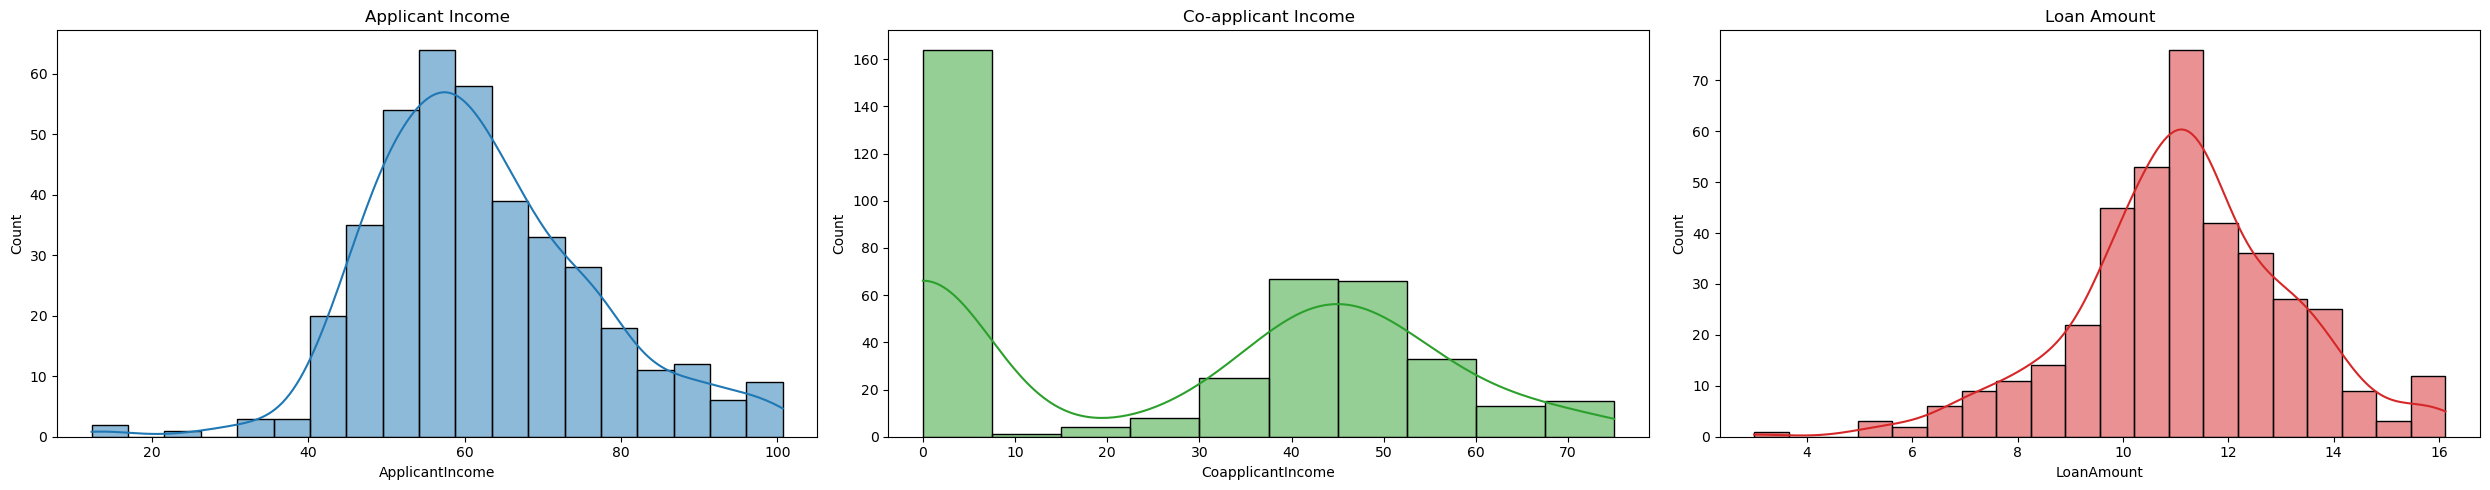

In [20]:
# Histogram and distribution plot of the 3 positive skewed distribution

# Creation of 3 sub graph
fig, axes = plt.subplots(1, 3, figsize=(25, 5))  # 1 lign and 3 columns

# Applicant Income
sns.histplot(data=df_ML, x='ApplicantIncome', kde=True, color="#1f77b4", ax=axes[0])  
axes[0].set_title("Applicant Income")

# Co-applicant Income
sns.histplot(data=df_ML, x='CoapplicantIncome', kde=True, color="#2ca02c", ax=axes[1])  
axes[1].set_title("Co-applicant Income")

# Loan Amount 
sns.histplot(data=df_ML, x='LoanAmount', kde=True, color="#d62728", ax=axes[2])  
axes[2].set_title("Loan Amount")


plt.tight_layout()
plt.show()


## Machine Learning Model

#### SMOTE (Synthetic Minority Over-sampling Technique)

In the analysis of loans (**loan approval**), it was noted that:

- There are **more loans accepted** than loans refused (**unbalanced data**).
- A model trained on this data could **learn to favor** the majority class (**approvals**), which **falsify** the predictions.
- To avoid this, we apply **SMOTE** in order to **balance** the two classes.

In [21]:
# X and y features

X = df_ML.drop(["Loan_Status"], axis=1)
y = df_ML["Loan_Status"]

In [22]:
# SMOTE

X, y = SMOTE().fit_resample(X, y)

# Scale the numerical columns using MinMaxScaler

X = MinMaxScaler().fit_transform(X)

Text(0.5, 1.0, 'Loan Approval Status')

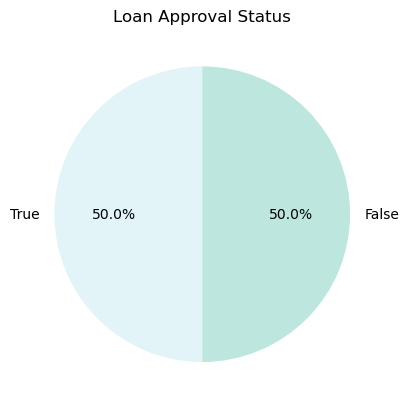

In [23]:
#Checking that the SMOTE technique works

loan_status_count = y.value_counts()

colors = sns.color_palette("BuGn")[:len(loan_status_count)]

plt.pie(loan_status_count, labels=loan_status_count.index, colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('Loan Approval Status')

#### Train/Test 

In [24]:
# Split the data into training and testing sets (80% train and 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


#### GridSearch 

In [26]:
# GridSearchCV method to have an optimal model

param_grid = {
    "n_estimators": [100, 500, 1000],  # Number of trees
    "max_leaf_nodes": range(2, 25),    # Max number of leaf nodes
    "max_depth": [None, 10, 20]        # Max depth of tree
}

rf = RandomForestClassifier(random_state = 42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score :", grid_search.best_score_)

#RandomizedSearchCV will test a subset of these hyperparameters


Meilleurs paramètres : {'max_depth': None, 'max_leaf_nodes': 23, 'n_estimators': 1000}
Meilleur score : 0.8951456310679612


#### Random Forest Model

In [27]:
rf_model = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=23, random_state=42)

# Train
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=23, n_estimators=1000, random_state=42)

In [28]:
# Prediction

y_pred = rf_model.predict(X_test)

y_pred

array([False, False, False,  True, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True, False, False,  True, False, False, False,  True,  True,
       False, False,  True,  True,  True, False,  True, False, False,
        True,  True, False,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False, False, False,
        True, False, False, False, False,  True,  True,  True, False,
       False,  True,  True,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True, False, False, False,  True, False, False, False,
        True, False,

In [29]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report 
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.93      0.91        54
        True       0.95      0.92      0.93        75

    accuracy                           0.92       129
   macro avg       0.92      0.92      0.92       129
weighted avg       0.92      0.92      0.92       129


Confusion Matrix:
 [[50  4]
 [ 6 69]]


## Conclusion

The final Random Forest model with MinMaxScaler provided a highly accurate (92%), balanced, and generalizable prediction system for loan approval. Scaling, handling imbalanced data, and tuning hyperparameters were crucial in achieving this performance. 

 #  Author

## Adel BELGROUN

--------------------------------------------------------------------------------------------------------------------------------------------------------------------